In [64]:
!pip install xgboost

In [65]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import RidgeCV

In [66]:
#reading the csv as data frame
data = pd.read_csv('Life Expectancy Data.csv')

In [67]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [68]:
data.shape

(2938, 22)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [70]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


We can see that the data has few missing values here and there

In [71]:
#we can start with dealing with the missing values 
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [72]:
#we will change the column names to something we can refer to easily 
data.columns = ['country', 'year', 'status', 'expectancy','adult_mortality', 'infant_death', 'alcohol', 'expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_1to19' , 'thinness_5to9', 'income_composition', 'schooling']

In [73]:
data.head()

,country,year,status,expectancy,adult_mortality,infant_death,alcohol,expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19,thinness_5to9,income_composition,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [74]:
#we will deal with all these missing values and since Life expectancy is our dependant variable we will remove the missing values row altogether from the data
data = data[data['expectancy'].notna()]

In [75]:
data.shape

(2928, 22)

In [76]:
#checking for null values
data.isna().sum()

country                 0
year                    0
status                  0
expectancy              0
adult_mortality         0
infant_death            0
alcohol               193
expenditure             0
hepatitis_b           553
measles                 0
bmi                    32
under_five_deaths       0
polio                  19
total_expenditure     226
diphtheria             19
hiv_aids                0
gdp                   443
population            644
thinness_1to19         32
thinness_5to9          32
income_composition    160
schooling             160
dtype: int64

In [77]:
#replacing the null values with the median
data = data.fillna(data.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [78]:
#rechecking for the null values
data.isna().sum()

country               0
year                  0
status                0
expectancy            0
adult_mortality       0
infant_death          0
alcohol               0
expenditure           0
hepatitis_b           0
measles               0
bmi                   0
under_five_deaths     0
polio                 0
total_expenditure     0
diphtheria            0
hiv_aids              0
gdp                   0
population            0
thinness_1to19        0
thinness_5to9         0
income_composition    0
schooling             0
dtype: int64

In [79]:
#now that we have dealt with the missing values we will check for any duplicates
data.duplicated().sum()

0

In [80]:
#replacing the categorical feature with 0 and 1
cleanup = {"status":{"Developing": 0, "Developed": 1}}

In [81]:
data = data.replace(cleanup)
data.head()

,country,year,status,expectancy,adult_mortality,infant_death,alcohol,expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19,thinness_5to9,income_composition,schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [82]:
#replacing the categorical variable with number codes
ord_enc = OrdinalEncoder()
data["country_code"] = ord_enc.fit_transform(data[["country"]])
data["country_code"].unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  43.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             2928 non-null   object 
 1   year                2928 non-null   int64  
 2   status              2928 non-null   int64  
 3   expectancy          2928 non-null   float64
 4   adult_mortality     2928 non-null   float64
 5   infant_death        2928 non-null   int64  
 6   alcohol             2928 non-null   float64
 7   expenditure         2928 non-null   float64
 8   hepatitis_b         2928 non-null   float64
 9   measles             2928 non-null   int64  
 10  bmi                 2928 non-null   float64
 11  under_five_deaths   2928 non-null   int64  
 12  polio               2928 non-null   float64
 13  total_expenditure   2928 non-null   float64
 14  diphtheria          2928 non-null   float64
 15  hiv_aids            2928 non-null   float64
 16  gdp   

In [84]:
data.corr()
#year, hepatitis_b, population, measles has very poor correlation with expectancy so we will drop these columns

,year,status,expectancy,adult_mortality,infant_death,alcohol,expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19,thinness_5to9,income_composition,schooling,country_code
year,1.000000e+00,5.545187e-15,0.170033,-0.079052,-0.036464,-0.065644,0.032723,0.022671,-0.081840,0.104057,...,0.071395,0.131852,-0.138789,0.093170,0.014749,-0.044805,-0.047860,0.235866,0.207311,3.339774e-14
status,5.545187e-15,1.000000e+00,0.482136,-0.315284,-0.112708,0.579723,0.454032,0.127101,-0.077320,0.313314,...,0.294290,0.215868,-0.149178,0.445682,-0.037888,-0.367643,-0.366138,0.461478,0.494753,3.267863e-02
expectancy,1.700330e-01,4.821361e-01,1.000000,-0.696359,-0.196557,0.390674,0.381864,0.171255,-0.157586,0.558888,...,0.209588,0.473268,-0.556556,0.430991,-0.028842,-0.467859,-0.462645,0.688591,0.717314,-1.790104e-02
adult_mortality,-7.905159e-02,-3.152844e-01,-0.696359,1.000000,0.078756,-0.191066,-0.242860,-0.123971,0.031176,-0.380592,...,-0.112176,-0.270877,0.523821,-0.281715,-0.005392,0.296076,0.301855,-0.436268,-0.435926,4.026192e-02
infant_death,-3.646405e-02,-1.127082e-01,-0.196557,0.078756,1.000000,-0.113919,-0.085906,-0.168393,0.501038,-0.226969,...,-0.126471,-0.175747,0.024955,-0.103175,0.551608,0.464762,0.470469,-0.141329,-0.192421,-2.894155e-02
alcohol,-6.564353e-02,5.797231e-01,0.390674,-0.191066,-0.113919,1.000000,0.344228,0.089540,-0.050490,0.321196,...,0.302242,0.212766,-0.047314,0.312735,-0.027387,-0.416992,-0.406089,0.420009,0.499675,-6.383849e-02
expenditure,3.272257e-02,4.540322e-01,0.381864,-0.242860,-0.085906,0.344228,1.000000,0.039805,-0.056831,0.229920,...,0.177355,0.142897,-0.098230,0.901803,-0.017070,-0.250729,-0.252366,0.375234,0.387937,-3.226254e-02
hepatitis_b,2.267079e-02,1.271006e-01,0.171255,-0.123971,-0.168393,0.089540,0.039805,1.000000,-0.073544,0.116743,...,0.066908,0.447373,-0.086197,0.076936,-0.125713,-0.099491,-0.102505,0.118166,0.134263,-1.313136e-02
measles,-8.184033e-02,-7.731993e-02,-0.157586,0.031176,0.501038,-0.050490,-0.056831,-0.073544,1.000000,-0.176132,...,-0.104294,-0.142680,0.030673,-0.069531,0.237096,0.224606,0.220869,-0.110884,-0.121817,-2.307884e-02
bmi,1.040567e-01,3.133139e-01,0.558888,-0.380592,-0.226969,0.321196,0.229920,0.116743,-0.176132,1.000000,...,0.227095,0.283207,-0.243364,0.277118,-0.069296,-0.531240,-0.538194,0.473592,0.510756,1.945245e-02


"None of [Index(['country'], dtype='object')] are in the [columns]"


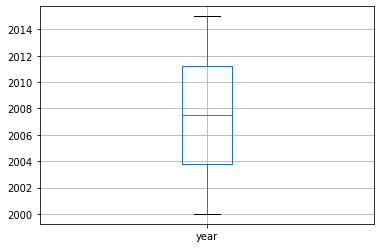

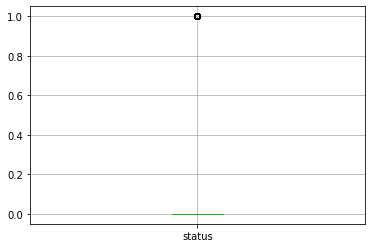

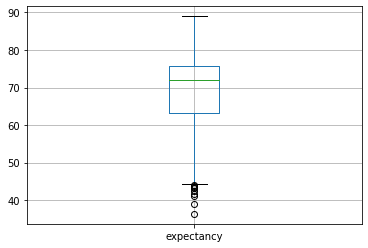

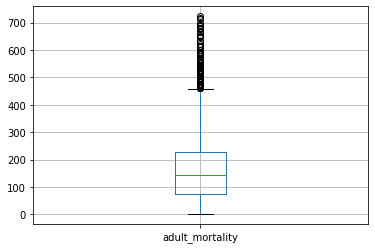

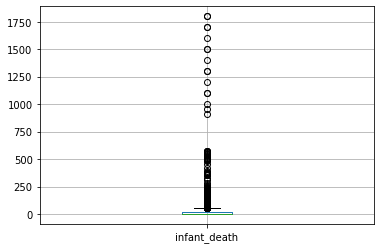

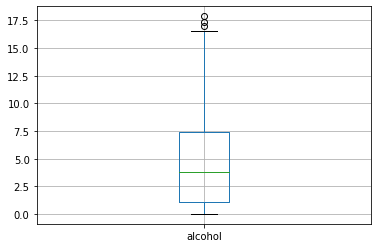

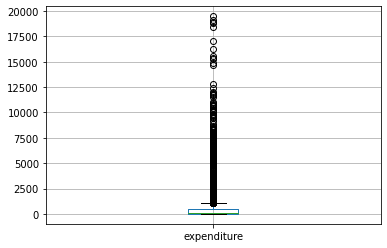

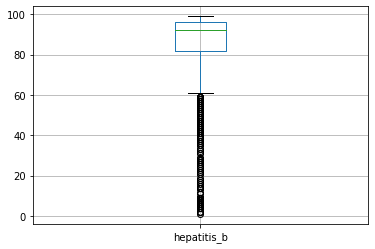

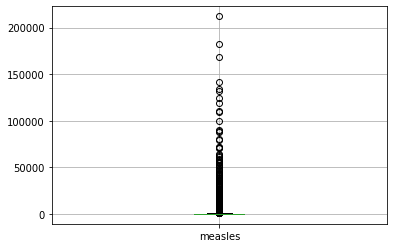

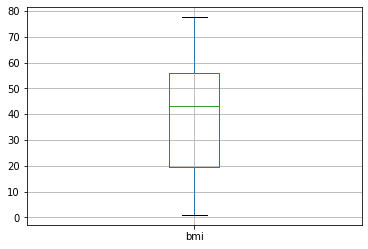

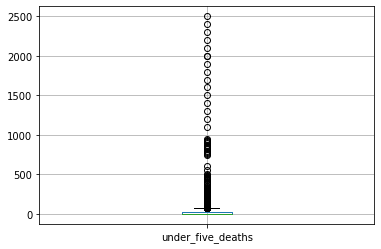

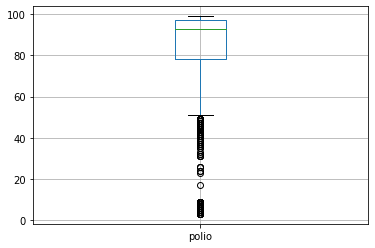

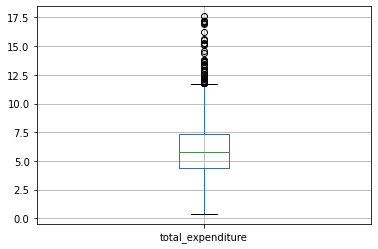

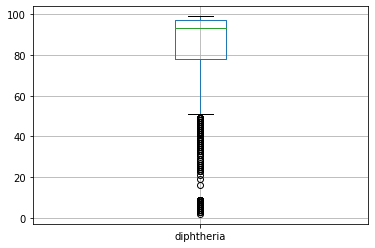

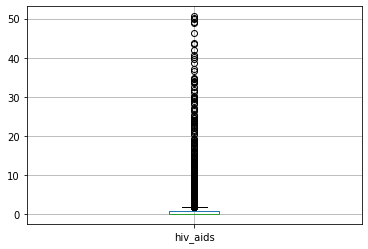

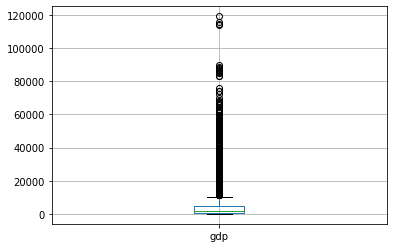

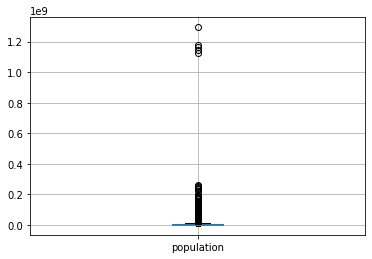

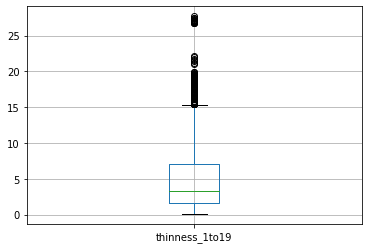

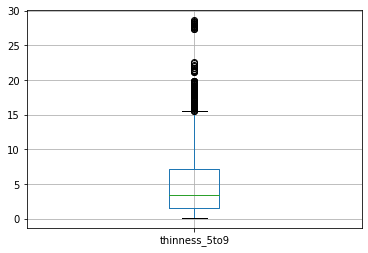

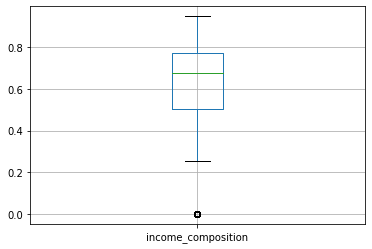

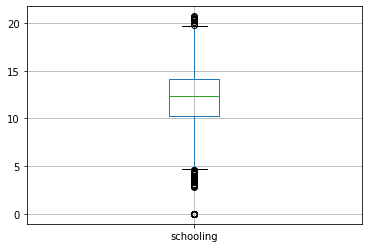

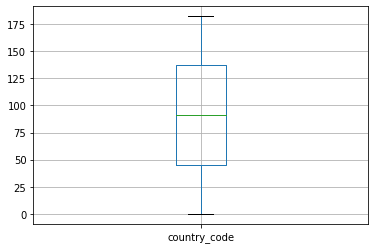

In [85]:
#now we will start the data exploration
for i in data.columns:
  try:
    data.iloc[:, 1:].boxplot(column=i)
    plt.show()
  except Exception as e :
    print (e) 

Distribution Plot for  country


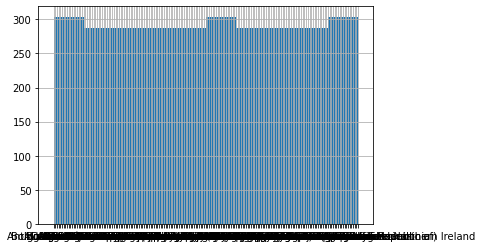

Distribution Plot for  year


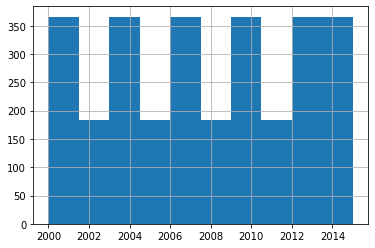

Distribution Plot for  status


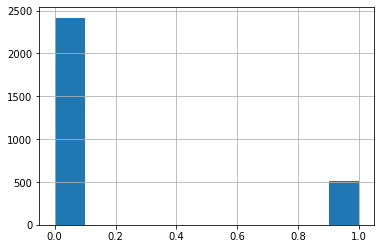

Distribution Plot for  expectancy


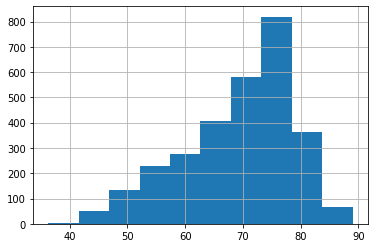

Distribution Plot for  adult_mortality


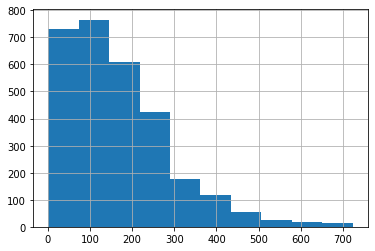

Distribution Plot for  infant_death


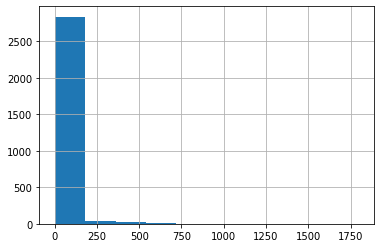

Distribution Plot for  alcohol


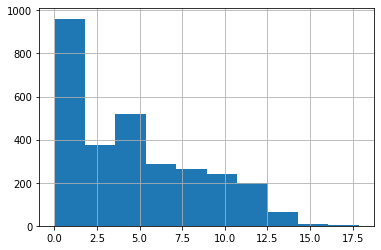

Distribution Plot for  expenditure


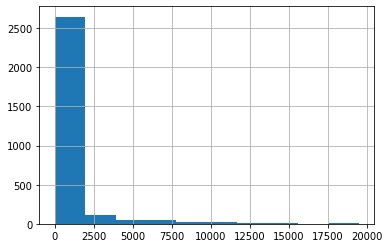

Distribution Plot for  hepatitis_b


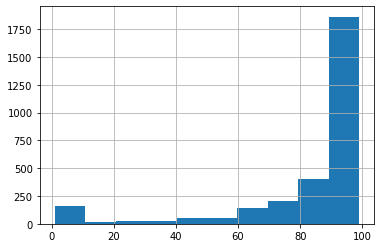

Distribution Plot for  measles


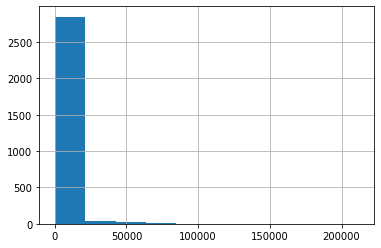

Distribution Plot for  bmi


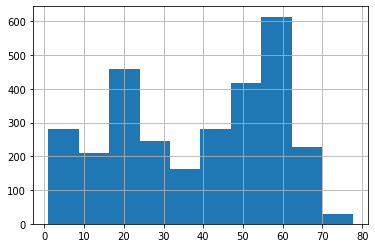

Distribution Plot for  under_five_deaths


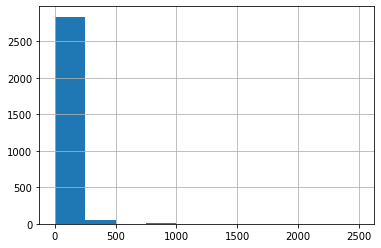

Distribution Plot for  polio


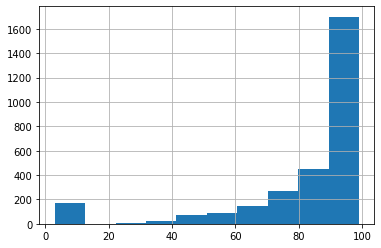

Distribution Plot for  total_expenditure


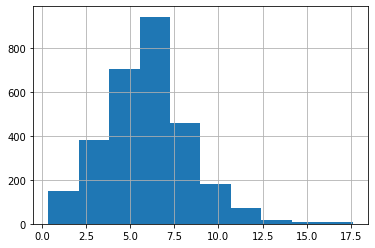

Distribution Plot for  diphtheria


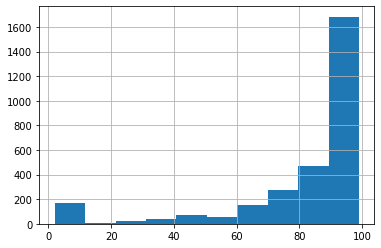

Distribution Plot for  hiv_aids


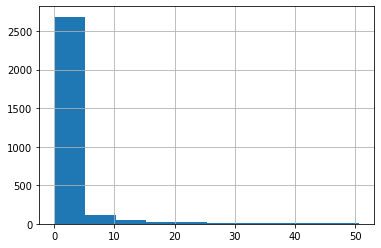

Distribution Plot for  gdp


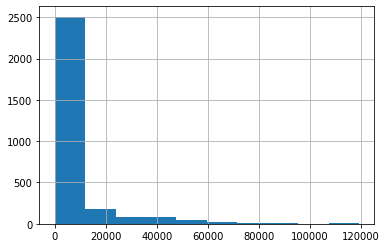

Distribution Plot for  population


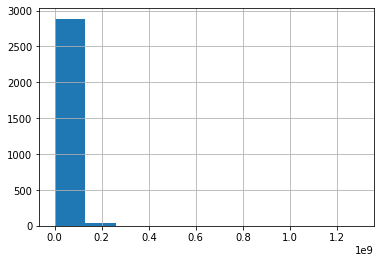

Distribution Plot for  thinness_1to19


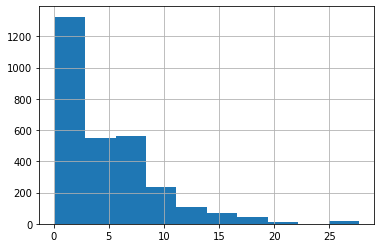

Distribution Plot for  thinness_5to9


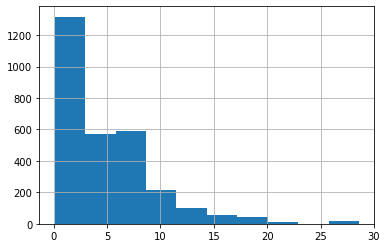

Distribution Plot for  income_composition


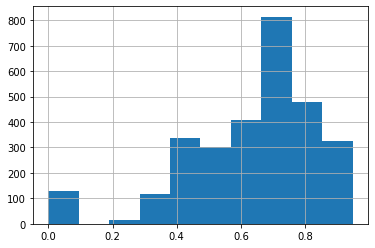

Distribution Plot for  schooling


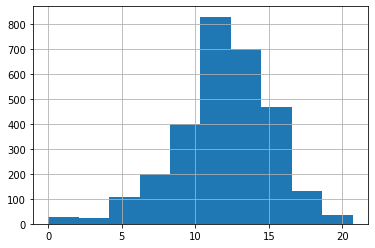

Distribution Plot for  country_code


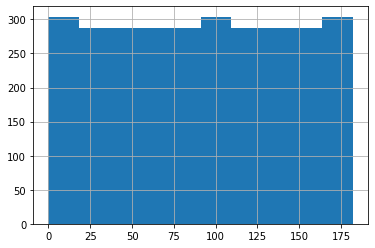

In [86]:
#distribution of the data
for col in data.columns:
    
    hist = data[col].hist(bins=10)
    print("Distribution Plot for  {0}".format(col))
    plt.show()

In [87]:
#copying data into a new dataframe to drop the unneccessary 
data_new = data
data_new.head()

,country,year,status,expectancy,adult_mortality,infant_death,alcohol,expenditure,hepatitis_b,measles,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19,thinness_5to9,income_composition,schooling,country_code
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.0
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.0
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.0
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.0


In [88]:
data_new.drop(columns = ['country', 'year', 'hepatitis_b', 'population', 'measles'] ,inplace = True)
#dropping country too because we have the coutry code column

In [89]:
data_new.shape

(2928, 18)

In [90]:
#splitting the data into X and Y
X = data_new.drop("expectancy", axis=1)
y = data_new["expectancy"]

In [91]:
#splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 547)

In [92]:
#creating the models
lin_regression = LinearRegression()
lasso = Lasso()
ridge = Ridge()
randomForest = RandomForestRegressor()
knn = KNeighborsRegressor()
xgb = XGBRegressor()
reg_models = [lin_regression,lasso,ridge,randomForest,knn,xgb]
print(reg_models)

[LinearRegression(), Lasso(), Ridge(), RandomForestRegressor(), KNeighborsRegressor(), XGBRegressor()]


In [93]:
model_score = {}
for model in reg_models:
   
    mod_result = {}
    try:
        model.fit(X_train, y_train)      
        y_pred =  model.predict(X_test)
        mod_result['Train Accuracy'] =  model.score(X_train, y_train) * 100
        mod_result['Test Accuracy'] =  model.score(X_test, y_test) * 100
        model_score[str(model)] = mod_result
        print (str(model))        
    except Exception as e:
       print ('Exception for Model {0} : {1}'.format(str(model),e))  

LinearRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.491e+01, tolerance: 2.090e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()
Ridge()
RandomForestRegressor()
KNeighborsRegressor()
[19:00:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()


In [94]:
for key , values in model_score.items():
   if key == 'Predicted':
     continue
   print()
   print(key)
   print(values)


LinearRegression()
{'Train Accuracy': 82.11932546974231, 'Test Accuracy': 81.06079756779151}

Lasso()
{'Train Accuracy': 81.19700361216957, 'Test Accuracy': 79.63998560202758}

Ridge()
{'Train Accuracy': 82.11888922769258, 'Test Accuracy': 81.06013548865553}

RandomForestRegressor()
{'Train Accuracy': 99.48386095487398, 'Test Accuracy': 96.01719253473061}

KNeighborsRegressor()
{'Train Accuracy': 87.53965052463826, 'Test Accuracy': 78.47109081736954}

XGBRegressor()
{'Train Accuracy': 96.18276738625201, 'Test Accuracy': 94.06116587341}


In [95]:
#so here we can clearly see that the randomforestregressor is the best performing model but it is overfitting so we will deal with that
#we will now use feature selection to see if we can improve the models 
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x7f97ccaffd40>)

In [96]:
#using feature selection
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [97]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 680.386857
Feature 1: 2112.585349
Feature 2: 89.804639
Feature 3: 393.667963
Feature 4: 379.771026
Feature 5: 1114.638463
Feature 6: 115.679457
Feature 7: 568.498995
Feature 8: 90.565558
Feature 9: 618.655081
Feature 10: 1023.970120
Feature 11: 502.019052
Feature 12: 679.371560
Feature 13: 644.968818
Feature 14: 2016.846488
Feature 15: 2293.067779
Feature 16: 1.069000


In [98]:
X_train.info()
#infant_death, under_five_death, total_expenditure and country_code doesnt have much importance so we will proceed with the other features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196 entries, 712 to 111
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              2196 non-null   int64  
 1   adult_mortality     2196 non-null   float64
 2   infant_death        2196 non-null   int64  
 3   alcohol             2196 non-null   float64
 4   expenditure         2196 non-null   float64
 5   bmi                 2196 non-null   float64
 6   under_five_deaths   2196 non-null   int64  
 7   polio               2196 non-null   float64
 8   total_expenditure   2196 non-null   float64
 9   diphtheria          2196 non-null   float64
 10  hiv_aids            2196 non-null   float64
 11  gdp                 2196 non-null   float64
 12  thinness_1to19      2196 non-null   float64
 13  thinness_5to9       2196 non-null   float64
 14  income_composition  2196 non-null   float64
 15  schooling           2196 non-null   float64
 16  count

In [99]:
data_new.drop( columns = ['infant_death', 'under_five_deaths', 'total_expenditure', 'country_code'],inplace = True)

In [100]:
X = data_new.drop("expectancy", axis=1)
y = data_new["expectancy"]

In [101]:
#applying zscore 
X_scaled = X.apply(zscore)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 547)

In [103]:
#using randomizedsearchcv for finding the best params
RF_ht = RandomForestRegressor()

params_rf = {"n_estimators": np.arange(60,90,1),"max_depth": np.arange(5,20,1),
          "max_features":np.arange(5,15,1),'min_samples_leaf': range(4, 8, 1),
    'min_samples_split': range(10, 20, 1)}

In [104]:
rf_random = RandomizedSearchCV(estimator = RF_ht, param_distributions = params_rf,
               n_iter = 5, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/parall

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': range(4, 8),
                                        'min_samples_split': range(10, 20),
                                        'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])},
                   random_state=35, verbose=2)

In [105]:
print (rf_random.best_params_)
print (rf_random.best_score_)

{'n_estimators': 63, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': 11, 'max_depth': 14}
0.9476300603343194


In [106]:
#using max depth 5 since the model is being overfitted if we use 14
model = RandomForestRegressor(n_estimators=63, min_samples_split= 16, min_samples_leaf= 6, max_features= 11, max_depth=5)

In [107]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=11, min_samples_leaf=6,
                      min_samples_split=16, n_estimators=63)

In [108]:
model.score(X_train, y_train) * 100

94.07906264050914

In [109]:
 model.score(X_test, y_test) * 100

92.22377663726834